In [53]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [55]:
train_df = pd.read_csv('preprocessed_train_complete_feature_engineering.csv')

In [57]:
X = train_df.drop('SalePrice', axis=1)  
y = train_df['SalePrice']  

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
elastic_net_cv = ElasticNetCV(
    l1_ratio=[.1, .5, .7, .9, .95, 1], 
    alphas=np.logspace(-4, 0, 50), 
    cv=5, 
    random_state=42
)

In [63]:
elastic_net_cv.fit(X_train, y_train)

ElasticNetCV(alphas=array([1.00000000e-04, 1.20679264e-04, 1.45634848e-04, 1.75751062e-04,
       2.12095089e-04, 2.55954792e-04, 3.08884360e-04, 3.72759372e-04,
       4.49843267e-04, 5.42867544e-04, 6.55128557e-04, 7.90604321e-04,
       9.54095476e-04, 1.15139540e-03, 1.38949549e-03, 1.67683294e-03,
       2.02358965e-03, 2.44205309e-03, 2.94705170e-03, 3.55648031e-03,
       4.29193426e-03, 5.179474...
       1.93069773e-02, 2.32995181e-02, 2.81176870e-02, 3.39322177e-02,
       4.09491506e-02, 4.94171336e-02, 5.96362332e-02, 7.19685673e-02,
       8.68511374e-02, 1.04811313e-01, 1.26485522e-01, 1.52641797e-01,
       1.84206997e-01, 2.22299648e-01, 2.68269580e-01, 3.23745754e-01,
       3.90693994e-01, 4.71486636e-01, 5.68986603e-01, 6.86648845e-01,
       8.28642773e-01, 1.00000000e+00]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], random_state=42)

In [65]:
y_pred = elastic_net_cv.predict(X_val)

In [67]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

In [69]:
print("Best alpha (regularization strength):", elastic_net_cv.alpha_)
print("Best L1 ratio (mixing Lasso and Ridge):", elastic_net_cv.l1_ratio_)
print("Validation RMSE:", rmse)

Best alpha (regularization strength): 0.0007906043210907702
Best L1 ratio (mixing Lasso and Ridge): 1.0
Validation RMSE: 0.1311937874163855


In [71]:
y_train_pred = elastic_net_cv.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Training RMSE:", train_rmse)

Training RMSE: 0.11493243524260977


In [73]:
print("Validation Predictions:", y_pred)

Validation Predictions: [11.92488171 12.70476955 11.53754073 12.00436091 12.70403754 11.27320399
 12.39886858 11.84494326 11.26393436 11.81516962 11.88553117 11.67803952
 11.42356476 12.31407494 12.06991535 11.79721167 12.17948986 11.79337389
 11.62742728 12.28804862 11.99389404 12.20945589 12.13011854 11.79424789
 12.21272412 11.95256197 12.20877408 11.63871245 12.0944986  12.15542426
 11.79964279 12.54917925 12.23438058 11.63275902 12.49236044 11.90108494
 11.82210487 12.2280681  12.68642334 11.53129223 11.78872964 12.34590521
 11.60676905 12.66255326 11.73720738 11.8095822  11.58308325 11.73470151
 12.9254819  11.75951432 11.68175749 12.21658082 11.63885343 12.55349785
 11.95572055 12.36089793 12.23430656 11.97981378 11.78190542 11.51058761
 11.15033802 12.0325729  12.60159066 12.42507042 12.6529812  12.24154777
 11.52316026 12.70390922 11.67621258 12.03394946 11.74837996 11.70048667
 11.59678144 11.33879311 12.97214023 12.103894   12.61157718 12.69438253
 11.88285071 11.70011689 11

In [75]:
test_df = pd.read_csv('preprocessed_test_complete_feature_engineering.csv')

if 'SalePrice' in test_df.columns:
    test_df = test_df.drop(columns=['SalePrice'])

test_predictions = elastic_net_cv.predict(test_df)

test_predictions = np.expm1(test_predictions)

submission = pd.DataFrame({
    'Id': pd.read_csv('test.csv')['Id'],  
    'SalePrice': test_predictions
})

submission.to_csv('submission.csv', index=False)

print("Test predictions saved to 'submission.csv'.")

Test predictions saved to 'submission.csv'.


In [77]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_train_pred = elastic_net_cv.predict(X_train)
y_val_pred = elastic_net_cv.predict(X_val)


train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))


train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)


print("Training RMSE: ", train_rmse)
print("Validation RMSE: ", val_rmse)

print("Training R-squared: ", train_r2)
print("Validation R-squared: ", val_r2)

Training RMSE:  0.11493243524260977
Validation RMSE:  0.1311937874163855
Training R-squared:  0.9133478507560168
Validation R-squared:  0.9077663647419987


In [79]:
import joblib

joblib.dump(elastic_net_cv, 'elastic_net_model.pkl')
print("Model saved to 'elastic_net_model.pkl'.") 

feature_names = X_train.columns  
joblib.dump(feature_names, 'feature_names.pkl')


Model saved to 'elastic_net_model.pkl'.


['feature_names.pkl']

In [81]:

loaded_model = joblib.load('elastic_net_model.pkl')


y_val_pred_loaded = loaded_model.predict(X_val)


val_rmse_loaded = np.sqrt(mean_squared_error(y_val, y_val_pred_loaded))
print("Validation RMSE after loading the model:", val_rmse_loaded)

Validation RMSE after loading the model: 0.1311937874163855


In [83]:
# This section is already present in your code, just run it in Jupyter:

print("Training RMSE: ", train_rmse)
print("Validation RMSE: ", val_rmse)

print("Training R-squared: ", train_r2)
print("Validation R-squared: ", val_r2)


Training RMSE:  0.11493243524260977
Validation RMSE:  0.1311937874163855
Training R-squared:  0.9133478507560168
Validation R-squared:  0.9077663647419987


In [85]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, explained_variance_score, max_error

# Make predictions on validation set
y_val_pred = elastic_net_cv.predict(X_val)
y_train_pred = elastic_net_cv.predict(X_train)

# Compute additional metrics for validation data
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
explained_variance_val = explained_variance_score(y_val, y_val_pred)
max_err_val = max_error(y_val, y_val_pred)

# Compute additional metrics for training data
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
explained_variance_train = explained_variance_score(y_train, y_train_pred)
max_err_train = max_error(y_train, y_train_pred)

# Print out additional metrics for validation and training data
print(f"Validation MAE: {mae_val}")
print(f"Validation MAPE: {mape_val}")
print(f"Validation Explained Variance: {explained_variance_val}")
print(f"Validation Max Error: {max_err_val}")

print(f"Training MAE: {mae_train}")
print(f"Training MAPE: {mape_train}")
print(f"Training Explained Variance: {explained_variance_train}")
print(f"Training Max Error: {max_err_train}")


Validation MAE: 0.08904467686195937
Validation MAPE: 0.007488938029044215
Validation Explained Variance: 0.9077711048374804
Validation Max Error: 0.7882773484742813
Training MAE: 0.07739237876820952
Training MAPE: 0.0064619699364996085
Training Explained Variance: 0.9133478507560168
Training Max Error: 1.1298245434739886


In [87]:
import pandas as pd

# Calculate the residuals for the validation set
residuals = y_val - y_val_pred

# Create a DataFrame with the actual values, predicted values, and residuals
outliers_df = pd.DataFrame({
    'Actual': y_val,
    'Predicted': y_val_pred,
    'Residual': residuals
})

# Sort the residuals by absolute value to find the largest errors
outliers_df['AbsResidual'] = outliers_df['Residual'].abs()
outliers_df_sorted = outliers_df.sort_values(by='AbsResidual', ascending=False)

# Display the top 10 largest outliers
top_outliers = outliers_df_sorted.head(10)
print("Top 10 Outliers:")
print(top_outliers)

# Merge with the validation set features for further investigation
X_val_outliers = X_val.loc[top_outliers.index]
outliers_with_features = X_val_outliers.copy()
outliers_with_features['Actual'] = top_outliers['Actual']
outliers_with_features['Predicted'] = top_outliers['Predicted']
outliers_with_features['Residual'] = top_outliers['Residual']

# Display the features of the top 10 outliers
print("Features of Top 10 Outliers:")
print(outliers_with_features)


Top 10 Outliers:
         Actual  Predicted  Residual  AbsResidual
30    10.596660  11.384937 -0.788277     0.788277
812   10.933000  11.491621 -0.558621     0.558621
588   11.870607  12.350200 -0.479594     0.479594
916   10.471978  10.951163 -0.479185     0.479185
1432  11.074436  11.543768 -0.469332     0.469332
628   11.813037  12.220220 -0.407182     0.407182
874   11.104972  11.508750 -0.403778     0.403778
898   13.323929  12.972140  0.351788     0.351788
691   13.534474  13.190893  0.343581     0.343581
479   11.401681  11.727982 -0.326301     0.326301
Features of Top 10 Outliers:
            Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
30    0.020562    0.294118     0.099315  0.033654     0.333333        0.375   
812   0.556546    0.000000     0.154110  0.034644     0.444444        0.500   
588   0.403016    0.000000     0.150685  0.111220     0.444444        0.875   
916   0.627827    0.000000     0.099315  0.035991     0.111111        0.250   
1432  0.9

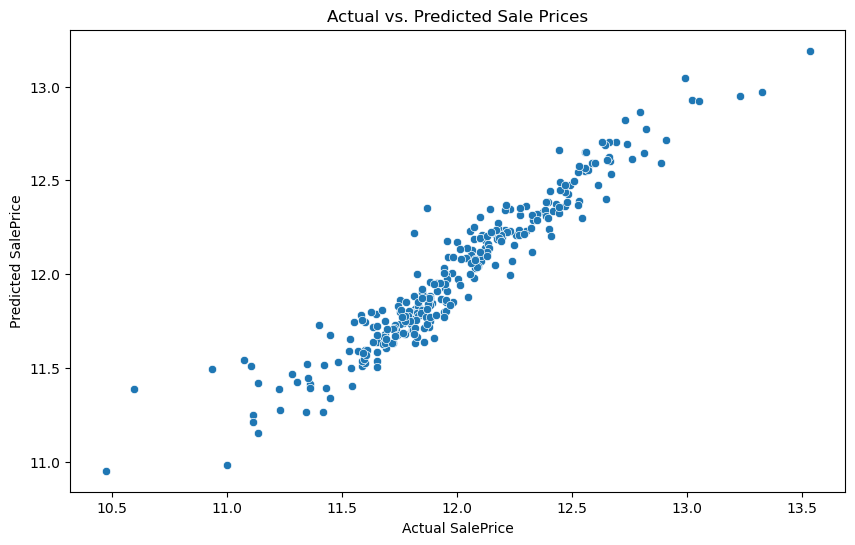

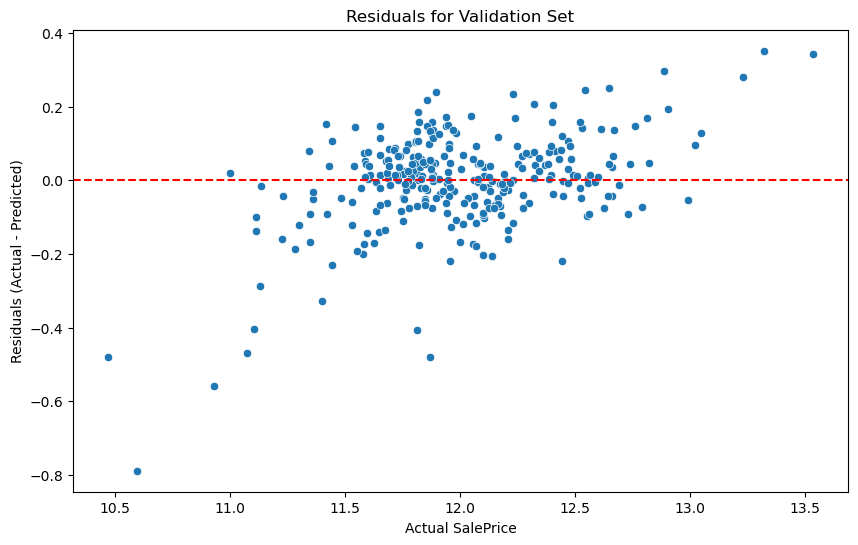

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Actual vs. Predicted values for validation set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_val_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted Sale Prices')
plt.show()

# Plot residuals (Actual - Predicted)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Actual SalePrice')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals for Validation Set')
plt.show()


In [95]:
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the trained Elastic Net model and feature names
model = joblib.load('elastic_net_model.pkl')  # Load the trained model
feature_names = joblib.load('feature_names.pkl')  # Load the feature names used during training

# Step 2: Load your training data to refit the scaler
train_df = pd.read_csv('preprocessed_train_complete_feature_engineering.csv')  # Load your training dataset

# Step 3: Separate the features (X) from the target (y)
X_train = train_df[feature_names]

# Step 4: Refit the MinMaxScaler on the training data
scaler = MinMaxScaler()
scaler.fit(X_train)  # Fit the scaler to the training data

# Save the fitted scaler if needed
joblib.dump(scaler, 'fitted_scaler.pkl')

# Step 5: Prepare the input data for prediction (same as before)
test_input = {
    "MSSubClass": 60,
    "LotFrontage": 70.0,
    "LotArea": 8500,
    "OverallQual": 7,
    "OverallCond": 5,
    "YearBuilt": 1995,
    "YearRemodAdd": 2005,
    "MasVnrArea": 100.0,
    "BsmtFinSF1": 800.0,
    "BsmtFinSF2": 0,
    "BsmtUnfSF": 300.0,
    "TotalBsmtSF": 1100.0,
    "1stFlrSF": 1000,
    "2ndFlrSF": 500,
    "LowQualFinSF": 0,
    "GrLivArea": 1500,
    "BsmtFullBath": 1,
    "BsmtHalfBath": 0,
    "FullBath": 2,
    "HalfBath": 1,
    "BedroomAbvGr": 3,
    "KitchenAbvGr": 1,
    "TotRmsAbvGrd": 7,
    "Fireplaces": 1,
    "GarageYrBlt": 1995,
    "GarageCars": 2,
    "GarageArea": 500,
    "WoodDeckSF": 100,
    "OpenPorchSF": 50,
    "EnclosedPorch": 0,
    "3SsnPorch": 0,
    "ScreenPorch": 0,
    "PoolArea": 0,
    "MiscVal": 0,
    "MoSold": 6,
    "YrSold": 2009,
    "TotalArea": 2100,
    "TotalPorchSF": 150,
    "GrLivArea^2": 2250000,
    "GrLivArea^3": 3375000000,
    "NeighborhoodEncoded": 5,
    "SpacePerRoom": 300,
    "TotalBath": 2.5,
    "MSZoning_FV": 0,
    "MSZoning_RH": 0,
    "MSZoning_RL": 1,
    "MSZoning_RM": 0,
    "Street_Pave": 1,
    "LotShape_Reg": 1,
    "LandContour_Lvl": 1,
    "LotConfig_Inside": 1,
    "Neighborhood_CollgCr": 1,
    "Condition1_Norm": 1,
    "BldgType_TwnhsE": 1,
    "HouseStyle_2Story": 1,
    "RoofStyle_Gable": 1,
    "RoofMatl_CompShg": 1,
    "Exterior1st_VinylSd": 1,
    "Foundation_PConc": 1,
    "BsmtQual_Gd": 1,
    "BsmtCond_TA": 1,
    "BsmtExposure_Gd": 1,
    "BsmtFinType1_GLQ": 1,
    "Heating_GasA": 1,
    "CentralAir_Y": 1,
    "Electrical_SBrkr": 1,
    "KitchenQual_Gd": 1,
    "Functional_Typ": 1,
    "FireplaceQu_Gd": 1,
    "GarageType_Attchd": 1
}

# Step 6: Convert the test input to a DataFrame and reindex
input_data = pd.DataFrame([test_input])
input_data = input_data.reindex(columns=feature_names, fill_value=0)

# Step 7: Scale the input data using the newly fitted scaler
input_data_scaled = scaler.transform(input_data)

# Step 8: Make the prediction using the scaled input data
predicted_log_saleprice = model.predict(input_data_scaled)

# Step 9: Reverse the log transformation to get the actual SalePrice
predicted_saleprice = np.expm1(predicted_log_saleprice[0])

# Step 10: Print the final predicted SalePrice
print(f"Predicted SalePrice: {predicted_saleprice}")





Predicted SalePrice: inf


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(
/var/folders/cv/f0vyvr1s5_9b72w82h02bj9r0000gn/T/ipykernel_11742/4132162296.py:108: RuntimeWarning: overflow encountered in expm1
  predicted_saleprice = np.expm1(predicted_log_saleprice[0])


In [97]:
# Print the scaled input data to verify it
print(input_data_scaled)


[[0.000e+00 6.000e+01 7.000e+01 8.500e+03 7.000e+00 5.000e+00 1.995e+03
  2.005e+03 1.000e+02 8.000e+02 0.000e+00 3.000e+02 1.100e+03 1.000e+03
  5.000e+02 0.000e+00 1.500e+03 1.000e+00 0.000e+00 2.000e+00 1.000e+00
  3.000e+00 1.000e+00 7.000e+00 1.000e+00 1.995e+03 2.000e+00 5.000e+02
  1.000e+02 5.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  6.000e+00 2.009e+03 2.100e+03 1.500e+02 2.250e+06 3.375e+09 5.000e+00
  3.000e+02 2.500e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.

In [99]:
# Check the predicted log sale price before applying expm1
predicted_log_saleprice = model.predict(input_data_scaled)
print("Predicted log SalePrice:", predicted_log_saleprice)


Predicted log SalePrice: [2295.29569014]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(


In [101]:
print("Feature names used in model:", feature_names)
print("Columns in input data:", input_data.columns)


Feature names used in model: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
       'AgeGroup_MidOld', 'AgeGroup_Modern', 'AgeGroup_New',
       'LotAreaGroup_Small', 'LotAreaGroup_Medium', 'LotAreaGroup_Large',
       'LotAreaGroup_Very Large'],
      dtype='object', length=259)
Columns in input data: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
       'AgeGroup_MidOld', 'AgeGroup_Modern', 'AgeGroup_New',
       'LotAreaGroup_Small', 'LotAreaGroup_Medium', 'LotAreaGroup_Large',
       'LotAreaGroup_Very Large'],
      dtype='object', length=259)


In [103]:
# Print input data before scaling
print("Input data before scaling:", input_data)

# Apply manual scaling for comparison
scaled_data = scaler.transform(input_data)
print("Scaled input data:", scaled_data)


Input data before scaling:    Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   0          60         70.0     8500            7            5       1995   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleCondition_Family  \
0          2005       100.0       800.0  ...                     0   

   SaleCondition_Normal  SaleCondition_Partial  AgeGroup_MidOld  \
0                     0                      0                0   

   AgeGroup_Modern  AgeGroup_New  LotAreaGroup_Small  LotAreaGroup_Medium  \
0                0             0                   0                    0   

   LotAreaGroup_Large  LotAreaGroup_Very Large  
0                   0                        0  

[1 rows x 259 columns]
Scaled input data: [[0.000e+00 6.000e+01 7.000e+01 8.500e+03 7.000e+00 5.000e+00 1.995e+03
  2.005e+03 1.000e+02 8.000e+02 0.000e+00 3.000e+02 1.100e+03 1.000e+03
  5.000e+02 0.000e+00 1.500e+03 1.000e+00 0.000e+00 2.000e+00 1.000e+00
  3.000e+00 1.000e+00 7.

In [105]:
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the trained Elastic Net model and feature names
model = joblib.load('elastic_net_model.pkl')  # Load the trained model
feature_names = joblib.load('feature_names.pkl')  # Load the feature names used during training

# Step 2: Load the training data and refit the MinMaxScaler (if needed)
train_df = pd.read_csv('preprocessed_train_complete_feature_engineering.csv')  # Load the training dataset
X_train = train_df[feature_names]  # Use only the features used during training

# Step 3: Fit the MinMaxScaler to the training data
scaler = MinMaxScaler()
scaler.fit(X_train)

# Step 4: Save the fitted scaler (if needed for future use)
joblib.dump(scaler, 'fitted_scaler.pkl')

# Step 5: Prepare the input data for prediction
test_input = {
    "MSSubClass": 60,
    "LotFrontage": 70.0,
    "LotArea": 8500,
    "OverallQual": 7,
    "OverallCond": 5,
    "YearBuilt": 1995,
    "YearRemodAdd": 2005,
    "MasVnrArea": 100.0,
    "BsmtFinSF1": 800.0,
    "BsmtFinSF2": 0,
    "BsmtUnfSF": 300.0,
    "TotalBsmtSF": 1100.0,
    "1stFlrSF": 1000,
    "2ndFlrSF": 500,
    "LowQualFinSF": 0,
    "GrLivArea": 1500,
    "BsmtFullBath": 1,
    "BsmtHalfBath": 0,
    "FullBath": 2,
    "HalfBath": 1,
    "BedroomAbvGr": 3,
    "KitchenAbvGr": 1,
    "TotRmsAbvGrd": 7,
    "Fireplaces": 1,
    "GarageYrBlt": 1995,
    "GarageCars": 2,
    "GarageArea": 500,
    "WoodDeckSF": 100,
    "OpenPorchSF": 50,
    "EnclosedPorch": 0,
    "3SsnPorch": 0,
    "ScreenPorch": 0,
    "PoolArea": 0,
    "MiscVal": 0,
    "MoSold": 6,
    "YrSold": 2009,
    "TotalArea": 2100,
    "TotalPorchSF": 150,
    "GrLivArea^2": 2250000,
    "GrLivArea^3": 3375000000,
    "NeighborhoodEncoded": 5,
    "SpacePerRoom": 300,
    "TotalBath": 2.5,
    "MSZoning_FV": 0,
    "MSZoning_RH": 0,
    "MSZoning_RL": 1,
    "MSZoning_RM": 0,
    "Street_Pave": 1,
    "LotShape_Reg": 1,
    "LandContour_Lvl": 1,
    "LotConfig_Inside": 1,
    "Neighborhood_CollgCr": 1,
    "Condition1_Norm": 1,
    "BldgType_TwnhsE": 1,
    "HouseStyle_2Story": 1,
    "RoofStyle_Gable": 1,
    "RoofMatl_CompShg": 1,
    "Exterior1st_VinylSd": 1,
    "Foundation_PConc": 1,
    "BsmtQual_Gd": 1,
    "BsmtCond_TA": 1,
    "BsmtExposure_Gd": 1,
    "BsmtFinType1_GLQ": 1,
    "Heating_GasA": 1,
    "CentralAir_Y": 1,
    "Electrical_SBrkr": 1,
    "KitchenQual_Gd": 1,
    "Functional_Typ": 1,
    "FireplaceQu_Gd": 1,
    "GarageType_Attchd": 1
}

# Step 6: Convert the test input to a DataFrame
input_data = pd.DataFrame([test_input])

# Step 7: Reindex to match feature names used during training and fill missing features with 0
input_data = input_data.reindex(columns=feature_names, fill_value=0)

# Step 8: Scale the input data using the fitted MinMaxScaler
input_data_scaled = scaler.transform(input_data)

# Step 9: Make the prediction using the scaled input data
predicted_log_saleprice = model.predict(input_data_scaled)

# Step 10: Reverse the log transformation (use np.exp if necessary)
predicted_saleprice = np.expm1(predicted_log_saleprice[0])

# Step 11: Print the final predicted SalePrice
print(f"Predicted SalePrice: {predicted_saleprice}")


Predicted SalePrice: inf


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(
/var/folders/cv/f0vyvr1s5_9b72w82h02bj9r0000gn/T/ipykernel_11742/2102461209.py:108: RuntimeWarning: overflow encountered in expm1
  predicted_saleprice = np.expm1(predicted_log_saleprice[0])


In [107]:
# Cap large values to prevent overflow
input_data['GrLivArea^2'] = np.clip(input_data['GrLivArea^2'], a_min=None, a_max=1e6)
input_data['GrLivArea^3'] = np.clip(input_data['GrLivArea^3'], a_min=None, a_max=1e9)

# Re-scale the data and make the prediction again
input_data_scaled = scaler.transform(input_data)
predicted_log_saleprice = model.predict(input_data_scaled)
predicted_saleprice = np.expm1(predicted_log_saleprice[0])

print(f"Predicted SalePrice: {predicted_saleprice}")


Predicted SalePrice: inf


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(
/var/folders/cv/f0vyvr1s5_9b72w82h02bj9r0000gn/T/ipykernel_11742/2329698432.py:8: RuntimeWarning: overflow encountered in expm1
  predicted_saleprice = np.expm1(predicted_log_saleprice[0])


In [109]:
# Print the values for GrLivArea, GrLivArea^2, and GrLivArea^3
print("GrLivArea:", input_data['GrLivArea'][0])
print("GrLivArea^2:", input_data['GrLivArea^2'][0])
print("GrLivArea^3:", input_data['GrLivArea^3'][0])


GrLivArea: 1500
GrLivArea^2: 1000000
GrLivArea^3: 1000000000


In [111]:
# Check the predicted log sale price
predicted_log_saleprice = model.predict(input_data_scaled)
print("Predicted log SalePrice:", predicted_log_saleprice)


Predicted log SalePrice: [2295.29569014]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(


In [113]:
# Print the scaled input data to check for abnormal values
print("Scaled input data:", input_data_scaled)


Scaled input data: [[0.000e+00 6.000e+01 7.000e+01 8.500e+03 7.000e+00 5.000e+00 1.995e+03
  2.005e+03 1.000e+02 8.000e+02 0.000e+00 3.000e+02 1.100e+03 1.000e+03
  5.000e+02 0.000e+00 1.500e+03 1.000e+00 0.000e+00 2.000e+00 1.000e+00
  3.000e+00 1.000e+00 7.000e+00 1.000e+00 1.995e+03 2.000e+00 5.000e+02
  1.000e+02 5.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  6.000e+00 2.009e+03 2.100e+03 1.500e+02 1.000e+06 1.000e+09 5.000e+00
  3.000e+02 2.500e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.0

In [115]:
# Normalize `GrLivArea^2` and `GrLivArea^3` to avoid large values
input_data['GrLivArea^2'] = input_data['GrLivArea'] ** 2
input_data['GrLivArea^3'] = input_data['GrLivArea'] ** 3

# Scale the values manually by a constant to bring them within a reasonable range
input_data['GrLivArea^2'] = input_data['GrLivArea^2'] / 1e6  # Scaling down by 1 million
input_data['GrLivArea^3'] = input_data['GrLivArea^3'] / 1e9  # Scaling down by 1 billion

# Now scale the entire input data again
input_data_scaled = scaler.transform(input_data)

# Make the prediction using the scaled input data
predicted_log_saleprice = model.predict(input_data_scaled)

# Reverse the log transformation to get the actual SalePrice
predicted_saleprice = np.expm1(predicted_log_saleprice[0])

# Print the final predicted SalePrice
print(f"Predicted SalePrice: {predicted_saleprice}")


Predicted SalePrice: inf


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(
/var/folders/cv/f0vyvr1s5_9b72w82h02bj9r0000gn/T/ipykernel_11742/2400616706.py:16: RuntimeWarning: overflow encountered in expm1
  predicted_saleprice = np.expm1(predicted_log_saleprice[0])


In [117]:
# Clip the large values to avoid overflow
input_data['GrLivArea^2'] = np.clip(input_data['GrLivArea^2'], a_min=None, a_max=1e6)
input_data['GrLivArea^3'] = np.clip(input_data['GrLivArea^3'], a_min=None, a_max=1e9)

# Now scale and make predictions
input_data_scaled = scaler.transform(input_data)

# Make the prediction using the scaled input data
predicted_log_saleprice = model.predict(input_data_scaled)

# Reverse the log transformation
predicted_saleprice = np.expm1(predicted_log_saleprice[0])

# Print the final predicted SalePrice
print(f"Predicted SalePrice: {predicted_saleprice}")


Predicted SalePrice: inf


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(
/var/folders/cv/f0vyvr1s5_9b72w82h02bj9r0000gn/T/ipykernel_11742/1128224074.py:12: RuntimeWarning: overflow encountered in expm1
  predicted_saleprice = np.expm1(predicted_log_saleprice[0])


In [129]:
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the trained Elastic Net model and feature names
model = joblib.load('elastic_net_model.pkl')
feature_names = joblib.load('feature_names.pkl')

# Step 2: Prepare the input data for prediction
test_input = {
    "MSSubClass": 60,
    "LotFrontage": 70.0,
    "LotArea": 9500,
}

# Convert the test input to a DataFrame
input_data = pd.DataFrame([test_input])

# Reindex to match feature names used during training and fill missing features with 0
input_data = input_data.reindex(columns=feature_names, fill_value=0)

# Print feature names for debugging
print("Input feature names:", input_data.columns)
print("Model feature names:", feature_names)

# Scale the input data using the MinMaxScaler
scaler = joblib.load('fitted_scaler.pkl')
input_data_scaled = scaler.transform(input_data)

# Predict log sale price and check for abnormal values
predicted_log_saleprice = model.predict(input_data_scaled)
print("Predicted log SalePrice:", predicted_log_saleprice)

# Cap large log sale prices to avoid overflow
predicted_log_saleprice = np.clip(predicted_log_saleprice, a_min=None, a_max=15)

# Reverse the log transformation
predicted_saleprice = np.expm1(predicted_log_saleprice[0])

# Print the final predicted SalePrice
print(f"Predicted SalePrice: {predicted_saleprice}")


Input feature names: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
       'AgeGroup_MidOld', 'AgeGroup_Modern', 'AgeGroup_New',
       'LotAreaGroup_Small', 'LotAreaGroup_Medium', 'LotAreaGroup_Large',
       'LotAreaGroup_Very Large'],
      dtype='object', length=259)
Model feature names: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
       'AgeGroup_MidOld', 'AgeGroup_Modern', 'AgeGroup_New',
       'LotAreaGroup_Small', 'LotAreaGroup_Medium', 'LotAreaGroup_Large',
       'LotAreaGroup_Very Large'],
      dtype='object', length=259)
Predicted log SalePrice: [6.23589716]
Predicted SalePrice: 509.75864630573

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(
